In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data/final_data/train.csv")

/home/jcapela/miniconda3/envs/plants_sm/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


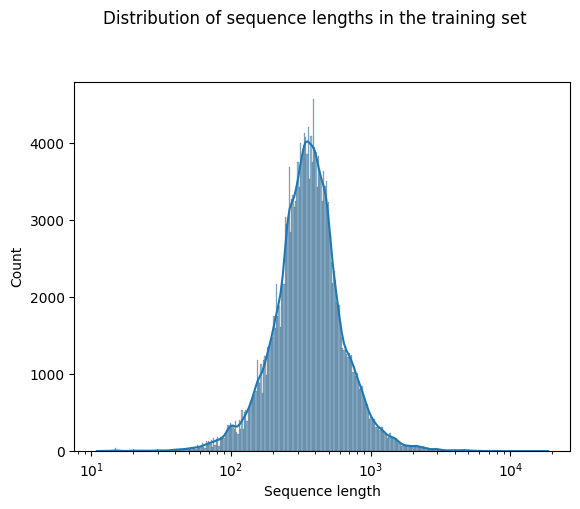

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#log scale
sns.histplot(x = train.sequence.str.len(), fill=True, kde=True, log_scale=True)
plt.suptitle("Distribution of sequence lengths in the training set", y = 1.03)
plt.xlabel("Sequence length")
plt.savefig("sequence_length_distribution.png", dpi=300, bbox_inches='tight')

In [4]:
print("Quantile 0.99: ", train.sequence.str.len().quantile(0.99))
print("Quantile 0.98: ", train.sequence.str.len().quantile(0.98))
print("Quantile 0.97: ", train.sequence.str.len().quantile(0.97))
print("Quantile 0.96: ", train.sequence.str.len().quantile(0.96))
print("Quantile 0.95: ", train.sequence.str.len().quantile(0.95))
print("Quantile 0.90: ", train.sequence.str.len().quantile(0.90))
print("Quantile 0.80: ", train.sequence.str.len().quantile(0.80))
print("Quantile 0.75: ", train.sequence.str.len().quantile(0.75))

Quantile 0.99:  1545.0
Quantile 0.98:  1220.1999999999825
Quantile 0.97:  1056.0
Quantile 0.96:  952.0
Quantile 0.95:  884.0
Quantile 0.90:  701.0
Quantile 0.80:  531.0
Quantile 0.75:  489.0


In [2]:
from plants_sm.data_structures.dataset.single_input_dataset import SingleInputDataset
from plants_sm.data_standardization.proteins.padding import SequencePadder
from plants_sm.featurization.encoding.one_hot_encoder import OneHotEncoder
from plants_sm.data_standardization.proteins.standardization import ProteinStandardizer

dataset = SingleInputDataset.from_csv(f"./train_test.csv", instances_ids_field="accession", representation_field="sequence", 
                            labels_field=slice(8, 2779))
ProteinStandardizer().fit_transform(dataset)
padder = SequencePadder(pad_width=884).fit(dataset)
padder.transform(dataset)

OneHotEncoder().fit_transform(dataset)
dataset.save_features(f"test.pkl")



OneHotEncoder: 100%|██████████| 100/100 [00:00<00:00, 1771.80it/s]


In [1]:
from plants_sm.featurization.proteins.bio_embeddings.esm import ESMEncoder
from plants_sm.data_structures.dataset.single_input_dataset import SingleInputDataset
from plants_sm.data_standardization.proteins.padding import SequencePadder
from plants_sm.featurization.encoding.one_hot_encoder import OneHotEncoder
from plants_sm.data_standardization.proteins.standardization import ProteinStandardizer

dataset = SingleInputDataset.from_csv(f"./train_test.csv", instances_ids_field="accession", representation_field="sequence", 
                            labels_field=slice(8, 2779))
ProteinStandardizer().fit_transform(dataset)
padder = SequencePadder(pad_width=884).fit(dataset)
padder.transform(dataset)

ESMEncoder(esm_function="esm2_t6_8M_UR50D", output_dim=3, batch_size=1).fit_transform(dataset)

/home/jcapela/miniconda3/envs/plants_sm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ESM: 100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


In [3]:
from plants_sm.featurization.proteins.bio_embeddings.prot_bert import ProtBert

ProtBert(output_shape_dimension=3, device="cuda").fit_transform(dataset)

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ProtBert: 100%|██████████| 100/100 [00:27<00:00,  3.70it/s]
